In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## E-Bike Analysis

In [2]:
df1 = pd.read_csv("data\E-Bike\Electric 2-Wheeler Sales.csv")

In [3]:
df1.head(15)

,type,financial_year,month,num_vehicles
0,E-2 Wheelers,2017-18,Apr,96
1,E-2 Wheelers,2017-18,May,91
2,E-2 Wheelers,2017-18,Jun,137
3,E-2 Wheelers,2017-18,Jul,116
4,E-2 Wheelers,2017-18,Aug,99
5,E-2 Wheelers,2017-18,Sep,109
6,E-2 Wheelers,2017-18,Oct,150
7,E-2 Wheelers,2017-18,Nov,214
8,E-2 Wheelers,2017-18,Dec,179
9,E-2 Wheelers,2017-18,Jan,173


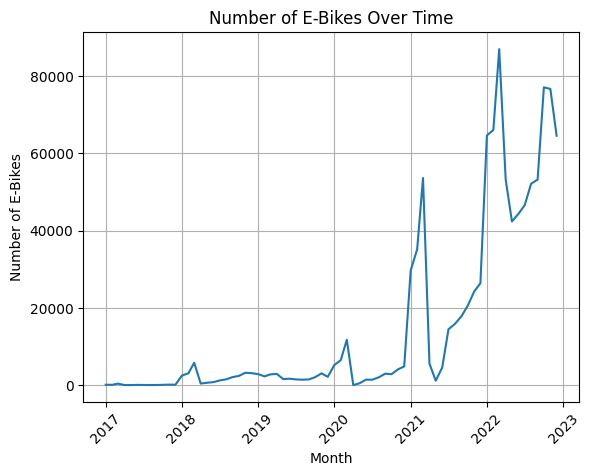

In [8]:
df1['date'] = pd.to_datetime(df1['financial_year'].str[:4] + '-' + df1['month'], format='%Y-%b')

# Aggregate number of vehicles per month across all financial years
monthly_data = df1.groupby('date')['num_vehicles'].sum()

# Create line plot
plt.plot(monthly_data.index, monthly_data.values, linestyle='-')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of E-Bikes')
plt.title('Number of E-Bikes Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)  # Add grid for better visualization
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Market Share over the years

In [18]:
year_19_20 = pd.read_csv("data\E-Bike\EV 2W FY 19-20.csv")
year_20_21 = pd.read_csv("data\E-Bike\EV 2W FY 20-21.csv")
year_21_22 = pd.read_csv("data\E-Bike\EV 2W FY 21-22.csv")
year_22_23 = pd.read_csv("data\E-Bike\EV 2W FY 22-23.csv")

years = [year_19_20, year_20_21, year_21_22, year_22_23]

In [10]:
year_19_20.head()

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,Hero Electric,0.3,Apr,1776
1,2019-20,Hero Electric,0.3,May,455
2,2019-20,Hero Electric,0.3,Jun,329
3,2019-20,Hero Electric,0.3,Jul,260
4,2019-20,Hero Electric,0.3,Aug,249


In [12]:
data = year_19_20[["maker","market_share"]]

In [14]:
data = data.drop_duplicates(subset=['maker'])

In [15]:
data.head()

,maker,market_share
0,Hero Electric,0.30
12,Okinawa Autotech,0.38
24,Ather Energy,0.11
36,Ampere Vehicles,0.09
48,Revolt,0.04


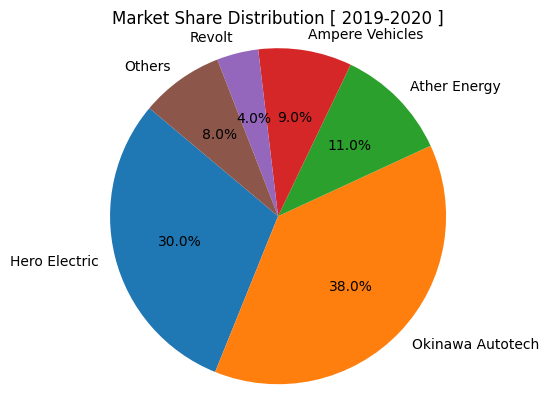

In [17]:
plt.pie(data["market_share"], labels=data["maker"], autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Market Share Distribution [ 2019-2020 ]')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

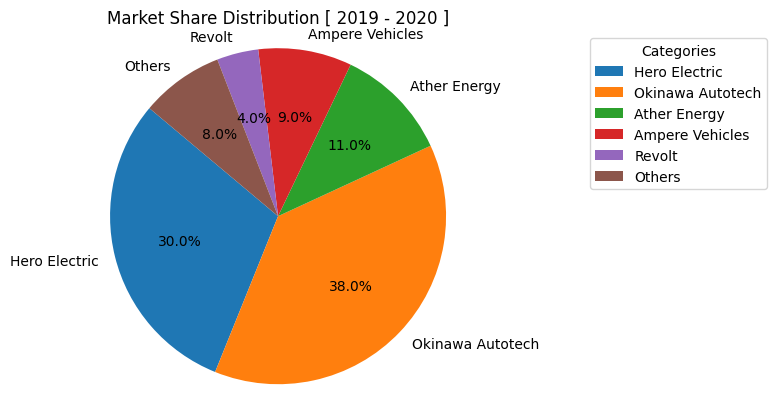

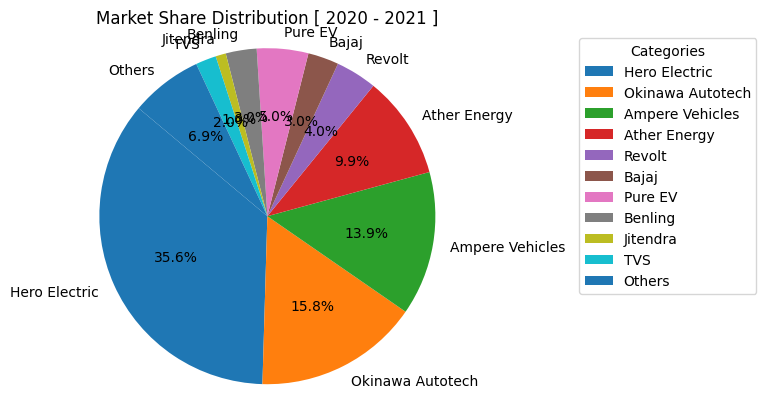

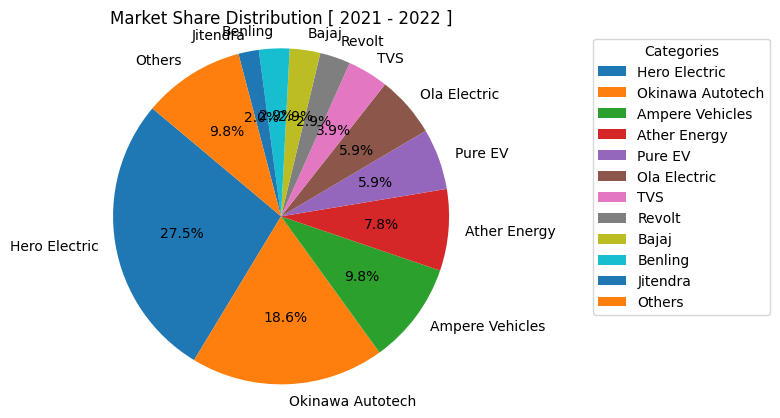

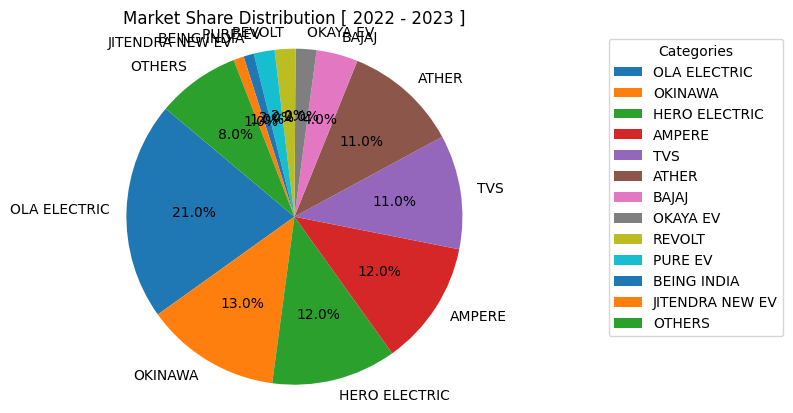

In [31]:
x = 2019
for i in years:
    data = i[["maker","market_share"]]
    
    data = data.drop_duplicates(subset=['maker'])

    plt.pie(data["market_share"], labels=data["maker"], autopct='%1.1f%%', startangle=140)

    plt.legend(title="Categories", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.title(f'Market Share Distribution [ {x} - {x+1} ]')
    x+=1

    plt.axis('equal')
    plt.show()

In [24]:
df2 = pd.read_csv("data\E-Bike\ev2_bikewale.csv")

## Customer Satisfaction Analysis

In [25]:
df2.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [29]:
df2.shape

(844, 14)

In [28]:
df2["Model Name"].unique()

array(['TVS iQube', 'Revolt RV 400', 'Bajaj Chetak', 'OLA S1 Pro',
       'Ather 450X', 'Hero Electric Optima', 'Tork Kratos', 'OLA S1',
       'Bounce Infinity E1', 'Hero Electric Optima CX',
       'Hero Electric Flash', 'Ampere Magnus EX', 'Revolt RV 300',
       'Hero Electric Photon', 'Okinawa Praise', 'Benling Aura',
       'Ampere Magnus Pro', 'PURE EV EPluto 7G', 'Ampere REO',
       'Odysse Evoqis', 'Hero Electric NYX HX', 'Okinawa i-Praise',
       'Joy e-bike Monster', 'PURE EV ETrance Neo', 'Evolet Polo',
       'Okinawa Ridge Plus', 'Ampere Zeal', 'Hero Electric Atria',
       'Okinawa Lite', 'Hero Electric NYX', 'Okinawa R30', 'Yo Drift',
       'BGauss B8', 'Joy e-bike Wolf', 'Gemopai Astrid Lite',
       'Techo Electra Emerge', 'Techo Electra Raptor', 'e-bike Gen Nxt',
       'Gemopai Ryder'], dtype=object)